# Randomness and probability: Stochastic thinking

Randomness &rarr; *unknown information* in dynamical processes

## Recovery from infection

Simple model of recovery from infection:
   - Constant recovery "rate"
   - Model as constant **probability** *p* to recover each day 
   - Models fact that peoples' immune systems behave differently
   - Affected by temperature, nutrition, dust in house etc.   

## Some relevant questions
   - How simulate this **stochastic process**?
   - How long will infection last?
   - Does it make sense to talk about an *average* infection duration? 
   - Is this, in the end, a "good model"?
   - Does it reproduce the data?

## Computing using randomness
How generate rendomness on computer?
   - Computers are deterministic, so *we can't*! 
   - Start-upsequence of computer generates "entropy" = unpredictable bits 
   - Use real physical process, e.g. noise from electronic circuit or [atmospheric noise](www.random.org)
   - Generate "random-looking" sequences using deterministic process, e.g. "linear congruential generator" (1970s).

### Pseudo-random numbers
- Uses sophisticated modern random number generator: Mersenne twister

# Modelling the recovery process using probability

Using previous model for $I_{n+1} = (1+c) I_n = \lambda * I_n$:

In [1]:
function run_infection(I₀, λ, T=20)
    
    I = zeros(T)
    I[1] = I₀
    
    for n in 1:T-1
        I[n+1] = λ * I[n]
    end

    return I
end

run_infection (generic function with 2 methods)

In [3]:
run_infection(1.,.1)

20-element Vector{Float64}:
 1.0
 0.1
 0.010000000000000002
 0.0010000000000000002
 0.00010000000000000003
 1.0000000000000004e-5
 1.0000000000000004e-6
 1.0000000000000005e-7
 1.0000000000000005e-8
 1.0000000000000005e-9
 1.0000000000000006e-10
 1.0000000000000006e-11
 1.0000000000000006e-12
 1.0000000000000007e-13
 1.0000000000000008e-14
 1.0000000000000009e-15
 1.000000000000001e-16
 1.000000000000001e-17
 1.000000000000001e-18
 1.000000000000001e-19

## Adding new data to extend a vector

In [22]:
v = [1.]

1-element Vector{Float64}:
 1.0

In [23]:
push!(v, 7.0) # ! means: function `push!` modifies its first argument

2-element Vector{Float64}:
 1.0
 7.0

In [24]:
length(v)

2

In [25]:
pushfirst!(v, 8) # deque - double-ended queue

3-element Vector{Float64}:
 8.0
 1.0
 7.0

In [26]:
function run_infection(I₀, λ, T=20)
    
    Iₛ = [I₀]
    I = I₀
    
    for n in 1:T-1
        Iₙₑₓₜ = λ * I
        push!(Iₛ, Iₙₑₓₜ)
        I = Iₙₑₓₜ
    end

    return Iₛ
end

run_infection (generic function with 2 methods)

In [27]:
run_infection(1.0,1.1)

20-element Vector{Float64}:
 1.0
 1.1
 1.2100000000000002
 1.3310000000000004
 1.4641000000000006
 1.6105100000000008
 1.771561000000001
 1.9487171000000014
 2.1435888100000016
 2.357947691000002
 2.5937424601000023
 2.853116706110003
 3.1384283767210035
 3.4522712143931042
 3.797498335832415
 4.177248169415656
 4.594972986357222
 5.054470284992944
 5.559917313492239
 6.115909044841463

## Randomness

In [28]:
using Random
using Plots

In [30]:
Random.seed!(3);

In [31]:
r = rand(100);

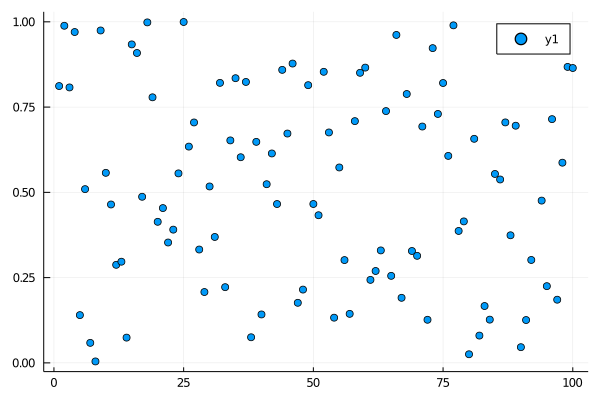

In [32]:
scatter(r)

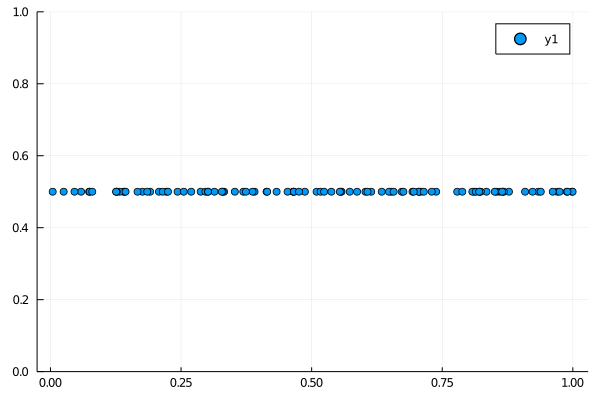

In [34]:
scatter(r, 0.5 .* one.(r), ylim=(0,1))

In [35]:
using Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-12461224699422390548\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-7483321332472496021\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-12461224699422390548\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [37]:
Nₚₒᵢₙₜₛ = 100
r = rand(Nₚₒᵢₙₜₛ)

@manipulate for n in 1:Nₚₒᵢₙₜₛ
    scatter(r[1:n], 0.5 * one.(r[1:n]), ylim=(0,1), xlim=(0,1))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 100, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Int64} with 2 listeners. Value:
50, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/marcon/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/marcon/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/marcon/.julia/packages/InteractBase/Zfu5P/src/../assets/all.js"), Asset("css", nothing, "/home/marcon/.julia/packages/InteractBase/Zfu5P/src/../assets/style.css"), Asset("css", nothing, "/home/marcon/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f1f05845510, Task (runnable) @0x00007f1f05845510), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",\"4

In [38]:
@manipulate for n in 1:Nₚₒᵢₙₜₛ
    scatter(r[1:n], 0.5 * one.(r[1:n]), ylim=(0,1), xlim=(0,1))
    end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 100, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Int64} with 2 listeners. Value:
50, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/marcon/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/marcon/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/marcon/.julia/packages/InteractBase/Zfu5P/src/../assets/all.js"), Asset("css", nothing, "/home/marcon/.julia/packages/InteractBase/Zfu5P/src/../assets/style.css"), Asset("css", nothing, "/home/marcon/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f1f09a43490, Task (runnable) @0x00007f1f09a43490), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",\"4

## Event with probability *p*

### Bernoulli Trials

In [41]:
function bernoulli(p)
    
    r = rand()
    return r < p
end

bernoulli (generic function with 1 method)

In [42]:
bernoulli(.5)

true

In [43]:
p = 0.25
trials = [bernoulli(p) for i in 1:100];

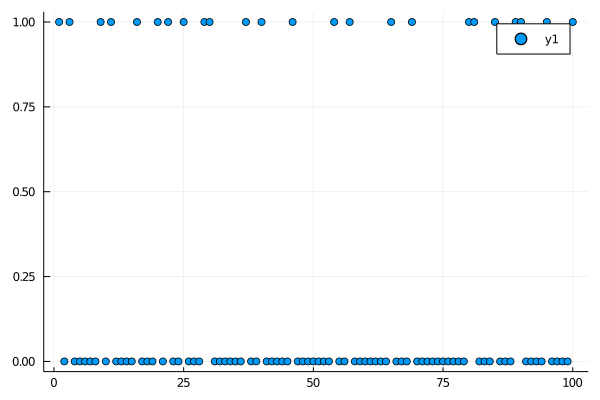

In [44]:
scatter(trials)

In [48]:
count(trials)

24

In [51]:
count(trials .== false)

76

In [53]:
count(.!(trials)) # ! is not

76

In [54]:
function bernoulli_experiment(p, N=100)
    trials = [bernoulli(p) for i in 1:N];
    return count(trials)
end

bernoulli_experiment (generic function with 2 methods)

In [56]:
bernoulli_experiment(0.25)

26

A function which has different **outcomes** in different runs is called a **random variable**

## Monte Carlo Simulation

Run the same random process a lot of times and look at the results

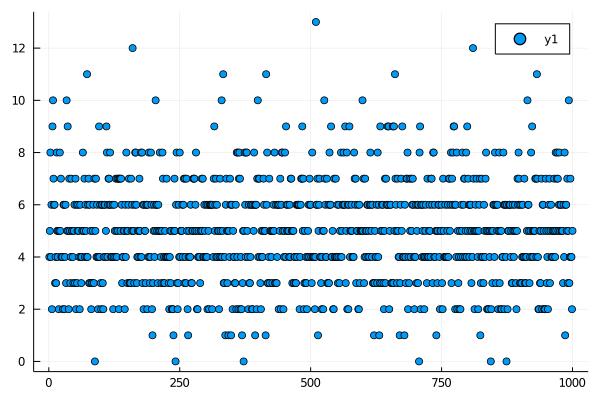

In [60]:
p = 0.25
Nₜᵣᵢₐₗₛ = 20
Nₑₓₚₑᵣᵢₘₑₙₜₛ = 1000

results = [bernoulli_experiment(p, Nₜᵣᵢₐₗₛ) for i in 1:Nₑₓₚₑᵣᵢₘₑₙₜₛ]
scatter(results)

$X$ = number of heads

**Probability distribution** of a random variable $X$

$\text{Prob}(X = x)$

Probability that $X = x$ = proportion of time that the result was $x$

## Counting

Need to count how many of th trials come out as 5

Need data structure where we store the counts.
- `Dict` (dictionary)
- `Vector`

In [62]:
maximum(results)

13

In [63]:
minimum(results)

0

In [64]:
l = maximum(results) + 1

14

In [65]:
counts = zeros(l);

In [66]:
for score in results[1:10]
    @show score
end

score = 4
score = 5
score = 8
score = 4
score = 6
score = 2
score = 9
score = 10
score = 7
score = 6


In [67]:
for score in results
    counts[score + 1] += 1
end

In [68]:
counts

14-element Vector{Float64}:
   6.0
  17.0
  86.0
 119.0
 194.0
 198.0
 186.0
  99.0
  57.0
  21.0
   9.0
   5.0
   2.0
   1.0

In [70]:
coutns = zeros(Int, maximum(results) + 1)

for score in results
    counts[score + 1] += 1
end

In [71]:
counts

14-element Vector{Float64}:
  18.0
  51.0
 258.0
 357.0
 582.0
 594.0
 558.0
 297.0
 171.0
  63.0
  27.0
  15.0
   6.0
   3.0

In [78]:
# ]add LaTeXStrings

   Resolving package versions...
    Updating `~/.julia/environments/v1.6/Project.toml`
  [b964fa9f] + LaTeXStrings v1.2.1
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


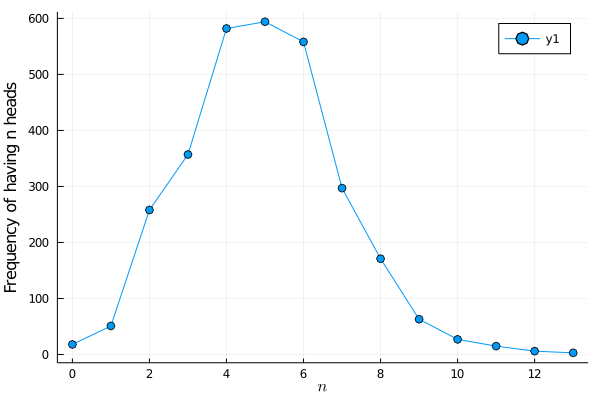

In [79]:
using LaTeXStrings

plot(0:maximum(results), counts, m=:o)
ylabel!("Frequency of having n heads")
xlabel!(L"n")

In [80]:
function count_them(results)
    counts = zeros(Int, maximum(results) + 1)
    
    for score in results
        counts[score + 1] += 1
    end
    
    return counts
end

count_them (generic function with 1 method)

In [81]:
function run_experiments(p, N, Nₑₓₚₜₛ = 1000)
    results = [bernoulli_experiment(p, N) for i in 1:Nₑₓₚₜₛ]
end

run_experiments (generic function with 2 methods)

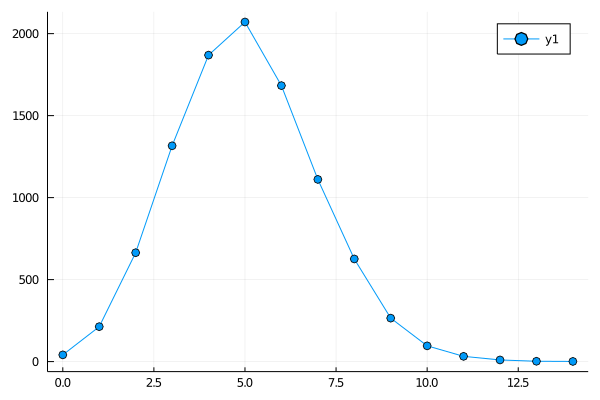

In [83]:
data = count_them(run_experiments(0.25, 20, 10000))
plot(0:length(data)-1, data, m=:o)

## Probability distribution

Probability = relative frequency
 
Divide by the number of experiments:

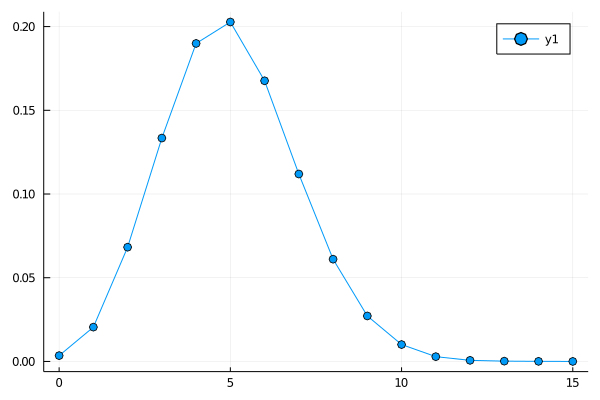

In [86]:
data = count_them(run_experiments(0.25, 20, 10^5))

plot(0:length(data)-1, data ./ sum(data), m=:o)

In [87]:
@time data = count_them(run_experiments(0.25, 20, 10^5))

  0.025842 seconds (100.00 k allocations: 11.444 MiB)


16-element Vector{Int64}:
   317
  2042
  6691
 13548
 19262
 20236
 16802
 11109
  5958
  2667
   964
   313
    71
    17
     2
     1

In [88]:
Nₑₓₚₜₛ = 10^5
data = count_them(run_experiments(0.25, 20, Nₑₓₚₜₛ))

probs = data ./ Nₑₓₚₜₛ

15-element Vector{Float64}:
 0.00313
 0.02102
 0.06891
 0.13522
 0.18802
 0.20162
 0.16734
 0.1129
 0.06135
 0.02684
 0.01002
 0.00278
 0.00067
 0.00014
 4.0e-5

In [89]:
sum(probs)

1.0

In [91]:
x = 3 // 4

3//4

In [92]:
typeof(x)

Rational{Int64}

In [93]:
x + x

3//2

In [94]:
probs = data .// Nₑₓₚₜₛ

15-element Vector{Rational{Int64}}:
   313//100000
  1051//50000
  6891//100000
  6761//50000
  9401//50000
 10081//50000
  8367//50000
  1129//10000
  1227//20000
   671//25000
   501//50000
   139//50000
    67//100000
     7//50000
     1//25000

In [95]:
sum(probs)

1//1

In [96]:
mean(data)

LoadError: UndefVarError: mean not defined

In [102]:
using Statistics
results = run_experiments(0.25, 20, 10^5)
mean(results)

4.99452

Expected mean value = $N * p$